# Task 1: Apply PCA on the numerical variables excluding Year
### Principal Component Analysis (PCA)
We begin by standardizing the numerical features, excluding the 'Year', as PCA is sensitive to the scale of the data. Then, we apply PCA to identify the principal components and explain the variance within our features.

In [1]:
#importing libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.cm as cm
from scipy.cluster.hierarchy import dendrogram, linkage



C:\Users\miles\AppData\Local\Temp\ipykernel_29232\208084290.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the dataset
df = pd.read_csv('IMDB-Movies.csv', index_col = 0)

In [3]:
#taking a look at the dataset
df.head()

,Title,Genre,Description,Director,Actors,Year,Runtime..Minutes.,Rating,Votes,Revenue..Millions.
1,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32
2,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57
3,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15
4,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99
5,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68


In [4]:
# Filter rows where all values are null
null_rows = df[df.isnull().any(axis=1)]

print(null_rows)

                             Title                    Genre  \
16                  Koe no katachi  Animation,Drama,Romance   
21                  Paint It Black                    Drama   
48  Twin Peaks: The Missing Pieces     Drama,Horror,Mystery   

                                          Description       Director  \
16  The story revolves around Nishimiya Shoko, a g...   Naoko Yamada   
21  A young woman attempts to deal with the death ...  Amber Tamblyn   
48  Twin Peaks before Twin Peaks (1990) and at the...    David Lynch   

                                               Actors  Year  \
16     Miyu Irino, Saori Hayami, Aoi Yuki, Kenshô Ono  2016   
21  Alia Shawkat, Nancy Kwan, Annabelle Attanasio,...  2016   
48  Chris Isaak, Kiefer Sutherland, C.H. Evans, Sa...  2014   

    Runtime..Minutes.  Rating  Votes  Revenue..Millions.  
16                129     8.4   2421                 NaN  
21                 96     8.3     61                 NaN  
48                 91     8.

Need to fill revenue for Koe no Katachi, Paint it Black, Twin Peaks: The Missing Pieces. Will do this by looking at revenue values for the movies through imdb or from estimates from similiar movies.

In [5]:
#Dealing with null values in revenue
#Using publicly avaiable information online to fill revenue of missing values
#Dictionary mapping titles to their corresponding values to fill null revenue
values_to_fill = {'Koe no katachi': 31.4, 'Paint It Black': 1.2, 'Twin Peaks: The Missing Pieces': 8.3}

# Fill null values with specified values for each title in the revenue column
for title, value in values_to_fill.items():
    df.loc[df['Title'] == title, 'Revenue..Millions.'] = df.loc[df['Title'] == title, 'Revenue..Millions.'].fillna(value)

print(df)

                                           Title                       Genre  \
1                                The Dark Knight          Action,Crime,Drama   
2                                      Inception     Action,Adventure,Sci-Fi   
3                                         Dangal      Action,Biography,Drama   
4                                   Interstellar      Adventure,Drama,Sci-Fi   
5                                  Kimi no na wa     Animation,Drama,Fantasy   
6                               The Intouchables      Biography,Comedy,Drama   
7                                   The Prestige        Drama,Mystery,Sci-Fi   
8                                   The Departed        Crime,Drama,Thriller   
9                          The Dark Knight Rises             Action,Thriller   
10                                      Whiplash                 Drama,Music   
11                           The Lives of Others              Drama,Thriller   
12                              Taare Za

In [6]:
# Standardizing the numerical variables excluding 'Year'
numerical_features = ['Runtime..Minutes.', 'Rating', 'Votes', 'Revenue..Millions.']
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[numerical_features])

# Applying PCA without specifying the number of components to retain all of them
pca = PCA()
pca.fit(df_standardized)

# Getting the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Printing explained variance ratio for each principal component
print("Explained Variance Ratio per Component:")
for i, variance in enumerate(explained_variance_ratio, start=1):
    print(f"Component {i}: {variance:.4f}")

# Printing cumulative explained variance
print("\nCumulative Explained Variance:")
for i, cum_variance in enumerate(cumulative_explained_variance, start=1):
    print(f"After Component {i}: {cum_variance:.4f}")
    

Explained Variance Ratio per Component:
Component 1: 0.4487
Component 2: 0.2834
Component 3: 0.1952
Component 4: 0.0727

Cumulative Explained Variance:
After Component 1: 0.4487
After Component 2: 0.7320
After Component 3: 0.9273
After Component 4: 1.0000


In [7]:
cumulative_explained_variance

array([0.44867575, 0.73204341, 0.92725572, 1.        ])

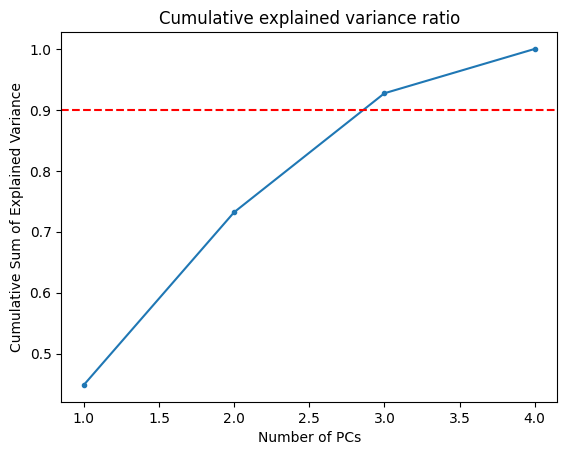

In [8]:
# Plot out the cumulative sum graph with a threshold of 0.9 variance 
plt.figure()
plt.plot(range(1,5) ,cumulative_explained_variance, marker='.')
plt.axhline(0.9, c='r', linestyle='--')
plt.title("Cumulative explained variance ratio")
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.show()

We have 3 principal components that can explain more than 90% of the variance which is the threshold we set as our minimum amount of variance that needs to be explained by the PCs.

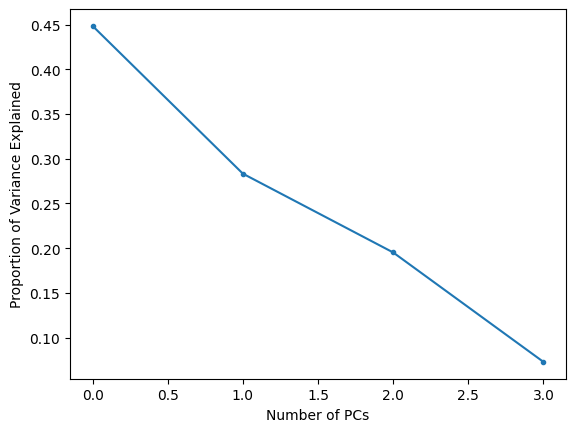

In [9]:
# using scree plot to look at variance
plt.figure()
plt.plot(explained_variance_ratio,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')

plt.show()

In this plot no sharp 'elbow' is seen and as a result will use our predefined 90% of variance to decide on 3 PCs

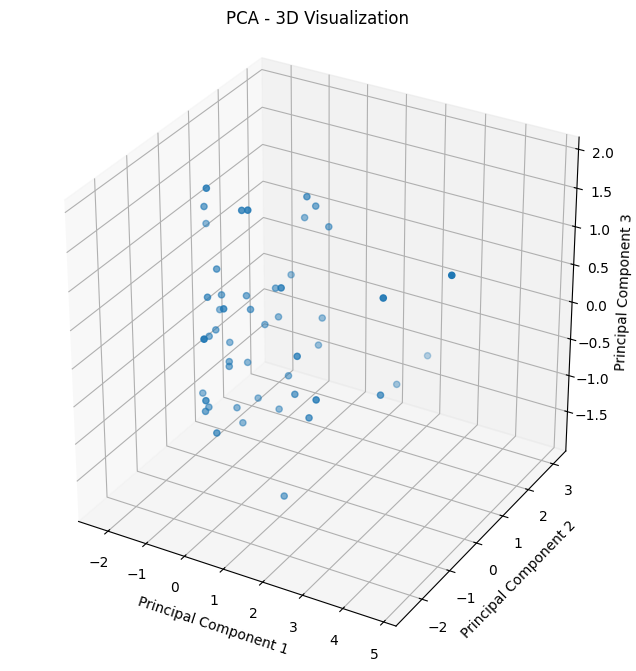

In [10]:
#reducing numerical data into 3 PCs and plotting visualiztion
my_PCA= PCA(n_components=3) #defining new 3 component pca
my_PCA.fit(df_standardized) #df_standardized from above is the caled data

# Transform data into the principal components
pca_transformed_data = my_PCA.transform(df_standardized) 


# Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], pca_transformed_data[:, 2])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA - 3D Visualization')
# Adjust aspect ratio
ax.set_box_aspect([1,1,1])
plt.show()

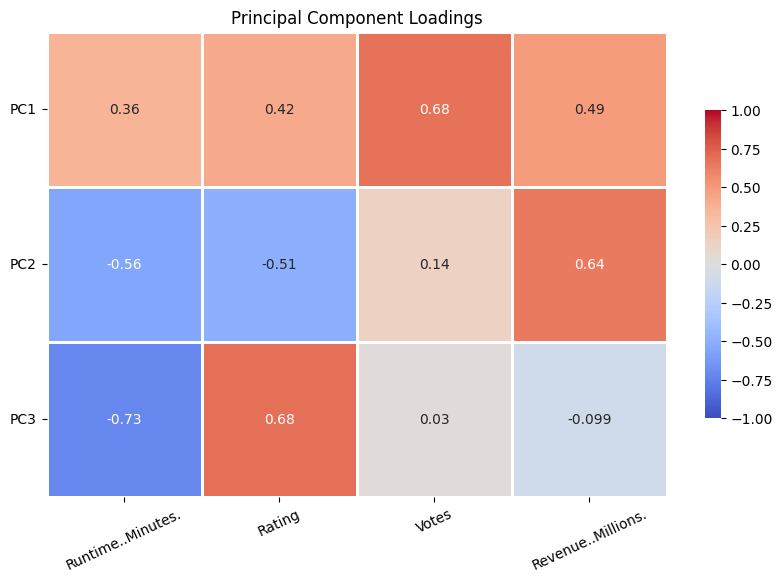

In [11]:
plt.figure(figsize=(10,8))

# Create a heatmap. The values are all contained in the .components_ attribute
ax = sns.heatmap(my_PCA.components_,
                 cmap='coolwarm',
                 yticklabels=[ "PC"+str(x) for x in range(1,my_PCA.n_components_+1)],
                 xticklabels=list(numerical_features),
                 linewidths = 1,
                 annot = True,
                 vmin=-1,
                 vmax=1,
                 cbar_kws={"orientation": "vertical","shrink": 0.5})

ax.set_title('Principal Component Loadings')
plt.yticks(rotation=0)
plt.xticks(rotation=25)
ax.set_aspect("equal")

In [12]:
pca_transformed_data

array([[ 4.78637603, -0.37158146,  1.50599862],
       [ 3.36937864, -0.68858736,  1.11445191],
       [ 0.30394028, -2.50939083,  0.7249328 ],
       [ 2.15493392, -1.28605583, -0.18604149],
       [-1.00629973, -0.69338562,  1.88734075],
       [-0.01724345, -0.62813251,  1.72571436],
       [ 0.76778349, -0.58104961,  0.82880925],
       [ 1.34630702, -0.82869774,  0.10535539],
       [ 2.83616706,  0.01489784, -0.46111191],
       [-0.42691759, -0.29710657,  1.56698262],
       [-0.28386243, -1.12277959,  0.57610751],
       [-0.15435916, -1.91802094, -0.34359096],
       [ 1.62152805, -0.80391462, -0.6748366 ],
       [-0.02986983, -1.74120851, -0.81506405],
       [ 0.2715148 ,  0.9810931 ,  1.45695636],
       [-1.01413802, -0.71795358,  0.49038608],
       [-0.49304141,  0.03757082,  0.16382557],
       [-0.67143585, -1.2893266 , -0.78435566],
       [ 0.993214  , -0.44047234, -0.58360455],
       [-1.19599251, -0.16980771,  0.66050981],
       [-1.81762775,  0.23803331,  1.265

In [13]:
#coverting back to a df
# Convert to DataFrame for better visualization
principal_df = pd.DataFrame(data=pca_transformed_data, columns=[f"PC{i}" for i in range(1, pca.n_components_)])

In [14]:
principal_df.head()

,PC1,PC2,PC3
0,4.786376,-0.371581,1.505999
1,3.369379,-0.688587,1.114452
2,0.303940,-2.509391,0.724933
3,2.154934,-1.286056,-0.186041
4,-1.006300,-0.693386,1.887341


Now we will look at some visualiztions of the data in th PCA space

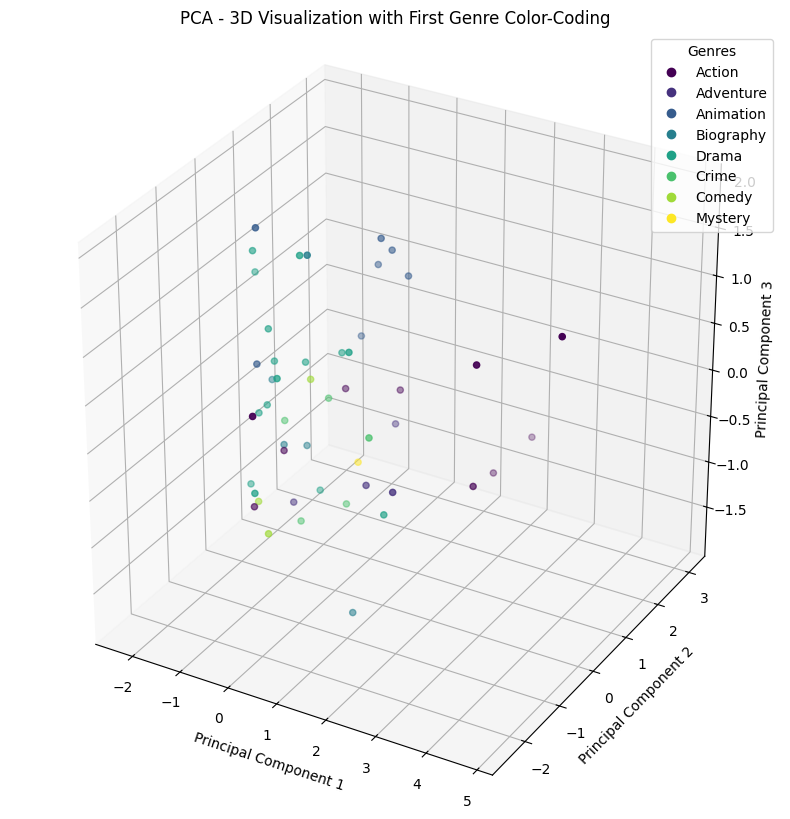

In [15]:
#Extracting some visualizations of the data
# Extract the first genre for each movie
df['First_Genre'] = df['Genre'].apply(lambda x: x.split(',')[0])

# Encode genres to integers for color-coding
genre_labels = pd.factorize(df['First_Genre'])[0]
unique_genres = df['First_Genre'].unique()  

# Plot with color-coding by first genre on 3 principal components
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(principal_df['PC1'], principal_df['PC2'], principal_df['PC3'], c=genre_labels, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA - 3D Visualization with First Genre Color-Coding')
# Adjust aspect ratio and limits
ax.set_box_aspect([1,1,1])  # Equal aspect ratio

# Create the legend
handles, labels = scatter.legend_elements()
# Convert numpy array to a list for the labels
ax.legend(handles, unique_genres.tolist(), title="Genres", loc="upper right")

plt.show()

# Task 2: Clustering Movies Based on Numerical Variables Excluding Year


### K-Means Clustering
To start on clustering, we use the K-Means algorithm on our PCA-transformed data that is in the df 'principal_df'. we need to find a good value for K. we'll use quantitative metrics like inertia or sil score. 

In [16]:
#setting up kmeams to find ideal k
ks = np.arange(1,10)

intertia = []

for k in ks:
    
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(principal_df)
    
    intertia.append(kmeans.inertia_)

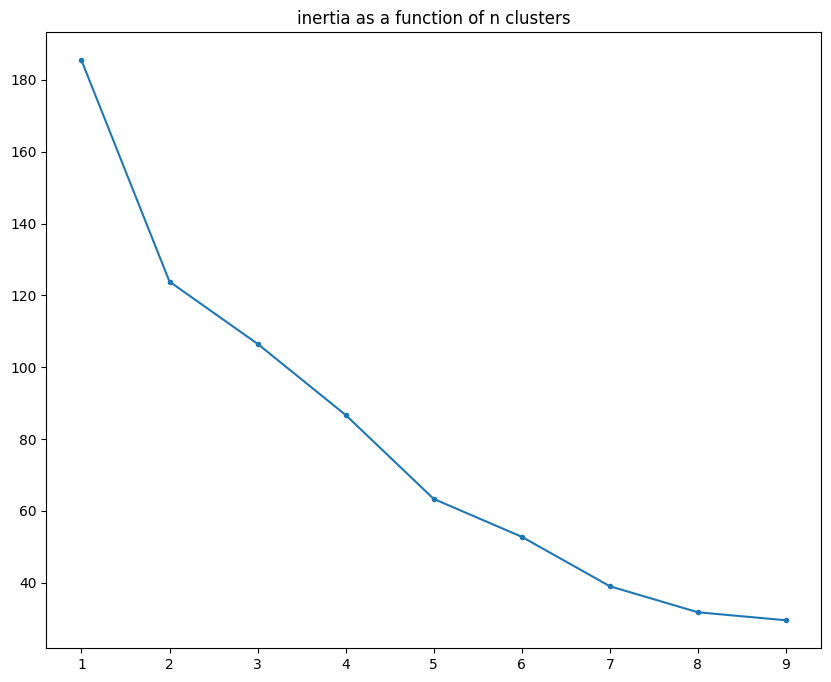

In [17]:
# let's plot inertia against the number of clusters

plt.figure(figsize = (10,8))
plt.plot(ks,intertia,marker = ".")
plt.title('inertia as a function of n clusters')
plt.show()

using the elbow method we can say that 2 looks pretty good, so does 5 but to a lesser extent. Moving on to get a second opinion from the sil score

In [18]:
#setting up sil to find ideal k
from sklearn.metrics import silhouette_score

ks = np.arange(2,10)

sil_scores = []

for k in ks:
    
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(principal_df)
    
    sil_scores.append(silhouette_score(principal_df,kmeans.labels_))
    
    

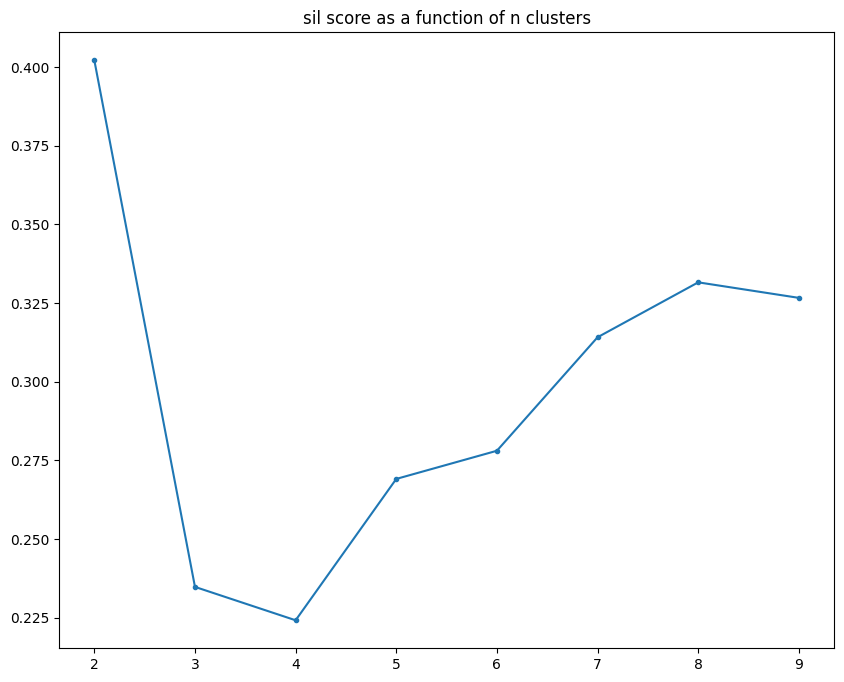

In [19]:
# plot 
plt.figure(figsize = (10,8))
plt.plot(ks,sil_scores,marker = ".")
plt.title('sil score as a function of n clusters')
plt.show()

We have agreement between the two metrics, there are 2 clusters present.

In [20]:
# Perform K-means clustering
#settling on k = 2
my_kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
my_kmeans.fit(principal_df)

#adding labels to pca df 
principal_df['kmeans'] = my_kmeans.labels_

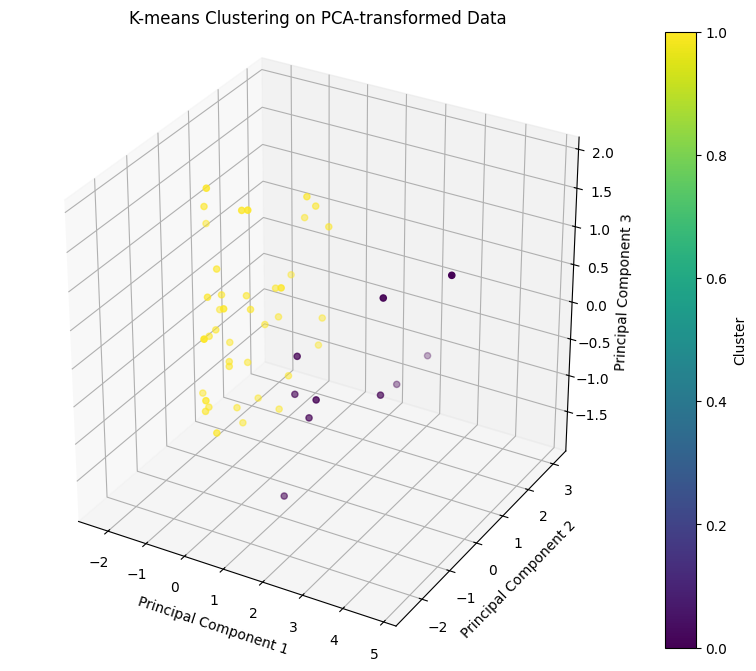

In [21]:
# Plot the clustered data on the 3 principal components 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(principal_df['PC1'], principal_df['PC2'], principal_df['PC3'], c=principal_df['kmeans'], cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('K-means Clustering on PCA-transformed Data')
# Adjust aspect ratio and limits
ax.set_box_aspect([1,1,1])  # Equal aspect ratio
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()


Now we will look at the clusters that kmeans created

In [22]:
#adding kmeans clusters to original df
df['kmeans'] = my_kmeans.labels_

In [23]:
# Examine the movies in each cluster
for i in range(my_kmeans.n_clusters):
    cluster_movies = df[df['kmeans'] == i]
    print(f"Movies in cluster {i}:")
    print(cluster_movies[['Title','Genre','Director','Year']])
    print("\n")


Movies in cluster 0:
                                         Title                     Genre  \
1                              The Dark Knight        Action,Crime,Drama   
2                                    Inception   Action,Adventure,Sci-Fi   
4                                 Interstellar    Adventure,Drama,Sci-Fi   
8                                 The Departed      Crime,Drama,Thriller   
9                        The Dark Knight Rises           Action,Thriller   
13                            Django Unchained             Drama,Western   
19                        Inglourious Basterds       Adventure,Drama,War   
25                     The Wolf of Wall Street    Biography,Comedy,Crime   
36  Star Wars: Episode VII - The Force Awakens  Action,Adventure,Fantasy   
39                                The Avengers             Action,Sci-Fi   

             Director  Year  
1   Christopher Nolan  2008  
2   Christopher Nolan  2010  
4   Christopher Nolan  2014  
8     Martin Scorsese 

In [24]:
# Report detailed cluster characteristics
for i in range(my_kmeans.n_clusters):
    cluster = df[df['kmeans'] == i]
    print(f"Cluster {i} characteristics:")
    # Display central tendencies of original features within each cluster
    print(cluster[numerical_features].describe())
    # Display the distribution of genres within each cluster
    print(cluster['Genre'].value_counts())
    print("\n")
    # Display the distribution of directors within each cluster
    print(cluster['Director'].value_counts())
    print("\n")
    # Display the distribution of years within each cluster
    print(cluster['Year'].value_counts())
    print("\n")


Cluster 0 characteristics:
       Runtime..Minutes.     Rating         Votes  Revenue..Millions.
count          10.000000  10.000000  1.000000e+01           10.000000
mean          156.100000   8.450000  1.115386e+06          355.448000
std            13.219934   0.295334  3.380270e+05          275.018867
min           136.000000   8.100000  6.616080e+05          116.870000
25%           148.750000   8.225000  9.428268e+05          139.977500
50%           152.500000   8.450000  1.042352e+06          240.280000
75%           164.750000   8.575000  1.178920e+06          512.022500
max           180.000000   9.000000  1.791916e+06          936.630000
Genre
Action,Crime,Drama          1
Action,Adventure,Sci-Fi     1
Adventure,Drama,Sci-Fi      1
Crime,Drama,Thriller        1
Action,Thriller             1
Drama,Western               1
Adventure,Drama,War         1
Biography,Comedy,Crime      1
Action,Adventure,Fantasy    1
Action,Sci-Fi               1
Name: count, dtype: int64


Director


In [25]:
#Looking at the mean of each clusters for the numerical values 
df.groupby('kmeans').agg({'Runtime..Minutes.': 'mean', 'Rating': 'mean', 'Votes': 'mean','Revenue..Millions.': 'mean'}).T

kmeans,0,1
Runtime..Minutes.,156.100,127.52500
Rating,8.450,8.25750
Votes,1115385.700,361614.10000
Revenue..Millions.,355.448,97.58925


### Heirarchical clustering

we take a bottom up approach, at the initial step, each data point is its own cluster. then, in a stepwise fashion we join clusters using a linkage measure of our choosing.

In [26]:
#seeting up to find best k for agglom clusters
ks = np.arange(2,10)

sil_scores = []

for k in ks:
    
    agglom = AgglomerativeClustering(n_clusters = k)
    
    agglom.fit(principal_df)
    
    sil_scores.append(silhouette_score(principal_df,agglom.labels_))

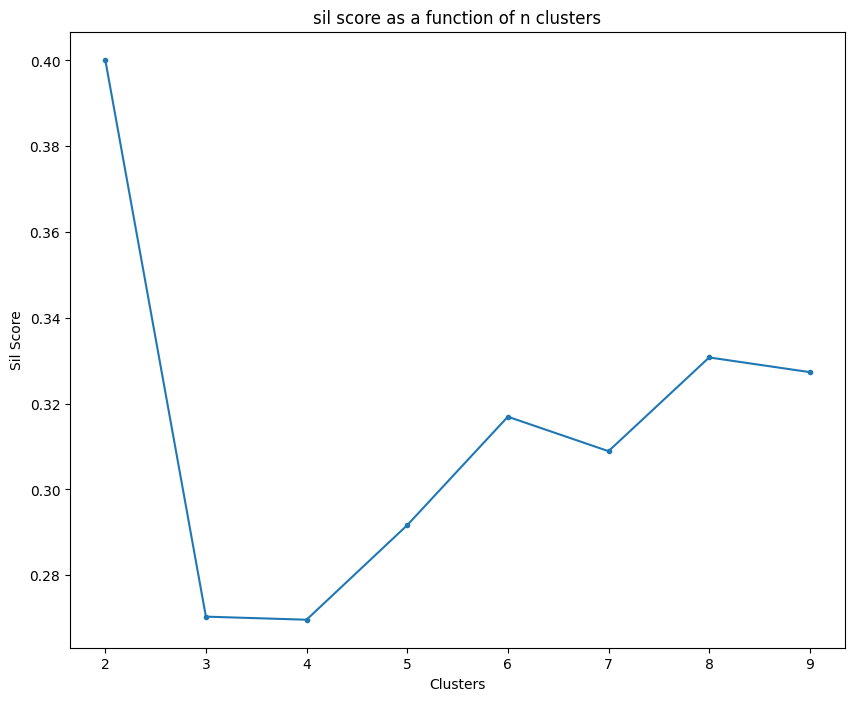

In [27]:
# plot 

plt.figure(figsize = (10,8))
plt.plot(ks,sil_scores,marker = ".")
plt.title('sil score as a function of n clusters')
plt.xlabel('Clusters')
plt.ylabel('Sil Score')
plt.show()


Heirarchical clustering gives us 2 clusters. This is similiar to what was seen in the sil score in kmeans where 2 had a high score.

In [28]:
#perform agglom clustering with k = 2
my_agglom = AgglomerativeClustering(n_clusters = 2)

my_agglom.fit(principal_df)

#adding labels to pca df 
principal_df['agglom'] = my_agglom.labels_

# Switching cluster labels to match kmeans method
principal_df['agglom'] = principal_df['agglom'].replace({0: 1, 1: 0})  # Switching labels 0 and 1

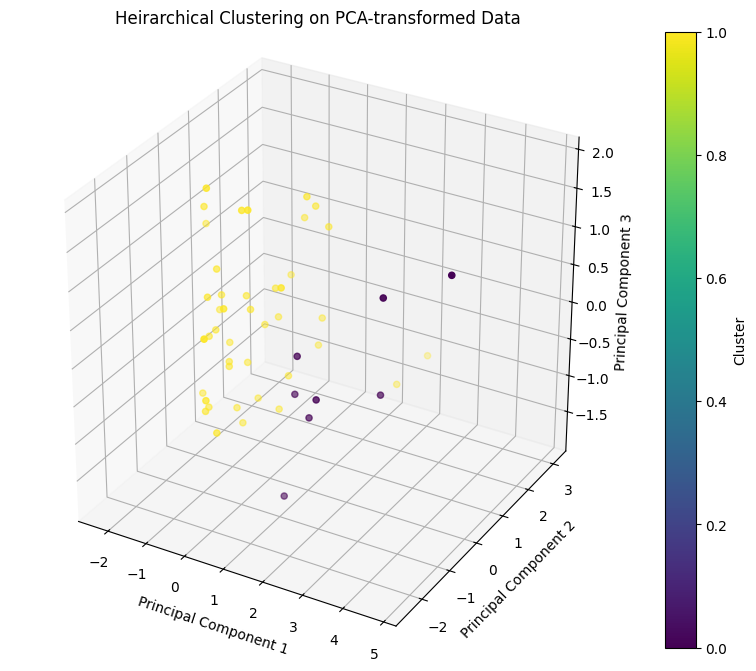

In [29]:
# Plot the clustered data on the 3 principal components 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(principal_df['PC1'], principal_df['PC2'], principal_df['PC3'], c=principal_df['agglom'], cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Heirarchical Clustering on PCA-transformed Data')
# Adjust aspect ratio and limits
ax.set_box_aspect([1,1,1])  # Equal aspect ratio
plt.colorbar(scatter, ax=ax, label='Cluster')

plt.show()

In [30]:
#adding agglom clusters to original df
df['agglom'] = my_agglom.labels_
# Switching cluster labels to match kmeans method
df['agglom'] = df['agglom'].replace({0: 1, 1: 0})  # Switching labels 0 and 1

In [31]:
# Examine the movies in each cluster
for i in range(my_agglom.n_clusters):
    cluster_movies = df[df['agglom'] == i]
    print(f"Movies in cluster {i}:")
    print(cluster_movies[['Title', 'Genre','Director','Year']])
    print("\n")

Movies in cluster 0:
                      Title                    Genre           Director  Year
1           The Dark Knight       Action,Crime,Drama  Christopher Nolan  2008
2                 Inception  Action,Adventure,Sci-Fi  Christopher Nolan  2010
4              Interstellar   Adventure,Drama,Sci-Fi  Christopher Nolan  2014
8              The Departed     Crime,Drama,Thriller    Martin Scorsese  2006
9     The Dark Knight Rises          Action,Thriller  Christopher Nolan  2012
13         Django Unchained            Drama,Western  Quentin Tarantino  2012
19     Inglourious Basterds      Adventure,Drama,War  Quentin Tarantino  2009
25  The Wolf of Wall Street   Biography,Comedy,Crime    Martin Scorsese  2013


Movies in cluster 1:
                                           Title                       Genre  \
3                                         Dangal      Action,Biography,Drama   
5                                  Kimi no na wa     Animation,Drama,Fantasy   
6             

In [32]:
# Report detailed cluster characteristics
for i in range(my_agglom.n_clusters):
    cluster = df[df['agglom'] == i]
    print(f"Cluster {i} characteristics:")
    # Display central tendencies of original features within each cluster
    print(cluster[numerical_features].describe())
    # Display the distribution of genres within each cluster
    print(cluster['Genre'].value_counts())
    print("\n")
    # Display the distribution of directors within each cluster
    print(cluster['Director'].value_counts())
    print("\n")
    # Display the distribution of years within each cluster
    print(cluster['Year'].value_counts())
    print("\n")

Cluster 0 characteristics:
       Runtime..Minutes.   Rating         Votes  Revenue..Millions.
count           8.000000  8.00000  8.000000e+00            8.000000
mean          160.250000  8.53750  1.180833e+06          249.321250
std            11.080872  0.26152  3.345162e+05          160.849887
min           148.000000  8.20000  8.651340e+05          116.870000
25%           151.750000  8.37500  9.536522e+05          129.407500
50%           158.500000  8.50000  1.043431e+06          175.395000
75%           166.000000  8.65000  1.312890e+06          331.460000
max           180.000000  9.00000  1.791916e+06          533.320000
Genre
Action,Crime,Drama         1
Action,Adventure,Sci-Fi    1
Adventure,Drama,Sci-Fi     1
Crime,Drama,Thriller       1
Action,Thriller            1
Drama,Western              1
Adventure,Drama,War        1
Biography,Comedy,Crime     1
Name: count, dtype: int64


Director
Christopher Nolan    4
Martin Scorsese      2
Quentin Tarantino    2
Name: count, dtyp

In [33]:
#Looking at the mean of each clusters for the numerical values 
df.groupby('agglom').agg({'Runtime..Minutes.': 'mean', 'Rating': 'mean', 'Votes': 'mean','Revenue..Millions.': 'mean'}).T

agglom,0,1
Runtime..Minutes.,1.602500e+02,128.095238
Rating,8.537500e+00,8.250000
Votes,1.180833e+06,385041.904762
Revenue..Millions.,2.493213e+02,130.082857


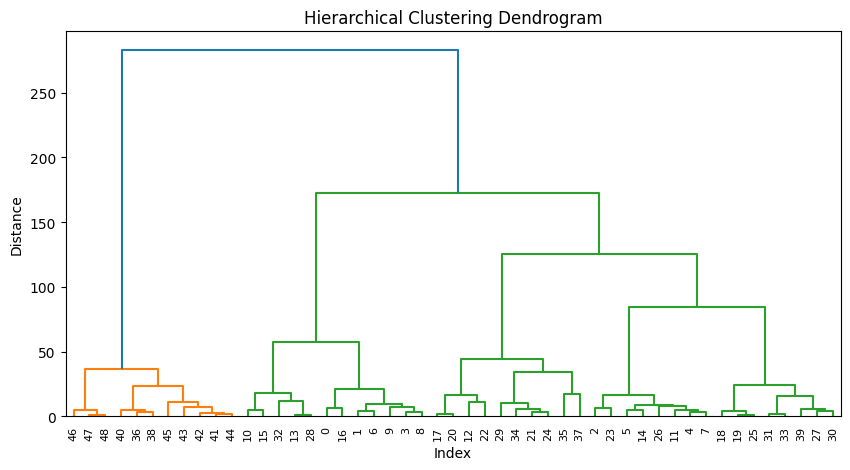

In [34]:
# Calculate linkage matrix
Z = linkage(my_agglom.children_, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [35]:
# Initialize an empty DataFrame for summary
cluster_summary = pd.DataFrame()
# Iterate through each cluster to gather summary statistics
for i in range(my_agglom.n_clusters):
    # Subset the DataFrame for the current cluster
    cluster = df[df['agglom'] == i]
    
    # Aggregate numerical features
    numerical_summary = cluster[numerical_features].mean().to_dict()
    
    # Find the top genres and their counts
    genre_counts = cluster['Genre'].value_counts().nlargest(2).to_dict()
    top_genres = ', '.join([f"{genre}: {count}" for genre, count in genre_counts.items()])
    
    # Find the top directors and their counts
    director_counts = cluster['Director'].value_counts().nlargest(2).to_dict()
    top_directors = ', '.join([f"{director}: {count}" for director, count in director_counts.items()])
    
    # Find the most common years and their counts
    year_counts = cluster['Year'].value_counts().nlargest(2).to_dict()
    top_years = ', '.join([f"{year}: {count}" for year, count in year_counts.items()])
    
    # Combine into a single summary row
    summary_row = {
        'Cluster': i,
        'Top Genres': top_genres,
        'Top Directors': top_directors,
        'Top Years': top_years,
        **numerical_summary
    }
    
    # Append this row to the cluster summary DataFrame
    cluster_summary = cluster_summary._append(summary_row, ignore_index=True)

# Optionally set the cluster column as the index
cluster_summary.set_index('Cluster', inplace=True)

# Display the summary
cluster_summary

,Top Genres,Top Directors,Top Years,Runtime..Minutes.,Rating,Votes,Revenue..Millions.
Cluster,,,,,,,
0,"Action,Crime,Drama: 1, Action,Adventure,Sci-Fi: 1","Christopher Nolan: 4, Martin Scorsese: 2","2012: 2, 2008: 1",160.250000,8.5375,1.180833e+06,249.321250
1,"Drama: 5, Animation,Adventure,Comedy: 4","Denis Villeneuve: 2, Damien Chazelle: 2","2016: 9, 2015: 6",128.095238,8.2500,3.850419e+05,130.082857


### Comparign the two clustering methods

In [36]:
#comparing the percentage of elements in the clusters that were predicted the same by both methods
pd.crosstab(principal_df['kmeans'],principal_df['agglom'])/50

agglom,0,1
kmeans,,
0,0.16,0.04
1,0.00,0.80


In [37]:
.8+.16

0.9600000000000001

we have 96% agreement between the two algorithms.